In [23]:
from numpy import *
import scipy.special 
import csv
import numpy as np
import math
from scipy import stats
from scipy.stats import norm
from scipy.stats import gamma
#import the data to Python 
with open('/Users/zhejindong/Downloads/data_csv/X_set3.csv') as csvfile:
    readCSV=csv.reader(csvfile)
    x1=[]
    for row in readCSV:
        x1.append(row)

for i in range(len(x1)):
    for j in range(len(x1[i])):
        x1[i][j]=float(x1[i][j])

X1=np.mat(x1).T

with open('/Users/zhejindong/Downloads/data_csv/y_set3.csv') as csvfile:
    readCSV=csv.reader(csvfile)
    y1=[]
    for row in readCSV:
        y1.append(row)
        
with open('/Users/zhejindong/Downloads/data_csv/y_set3.csv') as csvfile:
    readCSV=csv.reader(csvfile)
    y1=[]
    for row in readCSV:
        y1.append(row)

for i in range(len(y1)):
    for j in range(len(y1[i])):
        y1[i][j]=float(y1[i][j])    
Y1=np.mat(y1)



with open('/Users/zhejindong/Downloads/data_csv/z_set3.csv') as csvfile:
    readCSV=csv.reader(csvfile)
    z1=[]
    for row in readCSV:
        z1.append(row)

for i in range(len(y1)):
    for j in range(len(y1[i])):
        z1[i][j]=float(y1[i][j])    


## VI + Mean Field theory to update parameters

In [42]:
# initialize the prior parameters
a0=1e-16
b0=1e-16
e0=1.0
f0=1.0
d=X1.shape[0]# total number of unknown paramters 
n=X1.shape[1] # total number of data
# inintialize the disribution for alpha, w and lamda: alpha is a dim vector
a1=1.0 # parameters of q(alpha)
b1=1.0 # parameters of q(alpha)
e1=1.0 # parameters of q(lamda)
f1=1.0 # parameters of q(lamda)
#alpha= stats.gamma.rvs(a1,loc=0,scale=b1, size=d) 
alpha= stats.gamma.rvs(a1,loc=0,scale=b1, size=d) 
alpha=matrix(alpha).T # (101, 1) 0
diag=np.dot(np.eye(d, dtype=int),alpha)
diag=np.mat(np.diag(diag.A[ :, 0 ])) #(101, 101) the covariance of w not necessarily be diagnal 
lamda=stats.gamma.rvs(e1,loc=0,scale=f1,size=1) # lamda is a scalar #0.57197373
mean=np.random.normal(0,1,d)
w=np.random.multivariate_normal(mean, diag) 
w=np.mat(w)#(1, 101) 
mean=matrix(mean) #(1, 101) 
# 

In [43]:
def log_gamma(x):
    log=0
    while x!=0:
        log+=math.log(x)
        x-=1  
    return log

#log_gamma(251)

In [44]:
# interately update lamda, alpha and w 
Sum=[]
for iteration in range(0,500):
    #update alpha
    B=np.diag(diag).reshape((d, 1))+np.array(mean)*np.array(mean)
    #alpha= matrix(stats.gamma.rvs(a0+1/2.0,loc=0,scale=b0+B, size=d)).T
    a1=a0+1/2.0
    b1=b0+B/2
    #update w
    #diag=np.dot(np.eye(d, dtype=int),np.mat(a1/b1).T)
    diag=np.mat(np.diag(np.mat(a1/b1).A[ :, 0 ]))+e1/f1*X1.dot(X1.T)
    diag=diag.I
    mean=np.dot(diag,(e1/f1)*X1.dot(Y1))
    #update lamda
    e1=n/2.0+e0
    F=(np.square(Y1-np.dot(X1.T,mean)).sum()/2)+np.diag((X1.T*diag*X1)).sum()/2
    f1=f0+F
    L1=n/2.0*scipy.special.digamma(e1)-n/2.0*np.log(2*pi)-e1/f1*F
    L2=(a1-np.log(b1)).sum()/2-np.log(2*pi)/2-(B*(a1/b1)).sum()/2
    L3=d*a0*np.log(a0)+(a0-1)*(scipy.special.digamma(a1)-np.log(b1)).sum()-(a1/b1).sum()*b0-d*np.log(scipy.special.gamma(a0))
    L4=e0*np.log(f0)+(e0-1)*(scipy.special.digamma(e1)-np.log(f1))-f0*e1/f1-np.log(scipy.special.gamma(e0))
    L5=(a1-np.log(b1)+np.log(scipy.special.gamma(a1))+(1-a1)*scipy.special.digamma(a1)).sum()
    L6=1/2.0*np.log(np.linalg.det(2*pi*e*diag))
    #L7=e1-np.log(f1)+np.log(scipy.special.gamma(e1))+(1-e1)*scipy.special.digamma(e1)
    L7=e1-np.log(f1)+log_gamma(e1)+(1-e1)*scipy.special.digamma(e1)
    Sum.append(L1+L2+L3+L4+L5+L6+L7)
    

## Observe the objective function 

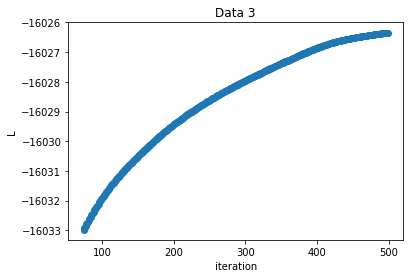

<Figure size 432x288 with 0 Axes>

In [45]:
import matplotlib.pyplot as plt
y=list(np.arange(1,500))
plt.scatter(y,Sum[1:500])
plt.xlabel('iteration')
plt.ylabel('L')
plt.title('Data 3')
plt.show()
plt.savefig('Desktop/pic1.jpg')

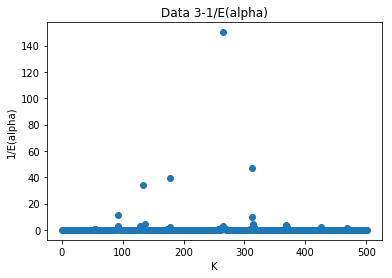

<Figure size 432x288 with 0 Axes>

In [46]:
y=list(np.arange(1,d+1))
plt.scatter(y,np.array(b1/a1).reshape(d,))
plt.xlabel('K')
plt.ylabel('1/E(alpha)')
plt.title('Data 3-1/E(alpha)')
plt.show()
plt.savefig('/Users/zhejindong/Desktop/pic2.jpg')

In [47]:
f1/e1 # average of 1/E(lamda)

0.9771873800233014

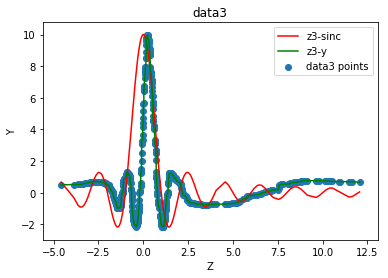

<Figure size 432x288 with 0 Axes>

In [49]:
#Eq(w)[w]
z1=np.sort(np.array(z1).reshape(n,))
z1=np.sort(np.array(z1))
p1=plt.plot(z1,np.sinc(np.array(z1).reshape(n,))*10,'r',label='z3-sinc')
y=list(np.arange(1,d+1))
p2=plt.scatter(z1,np.array(X1.T.dot(mean)),label='data3 points')
p3=plt.plot(z1,np.array(X1.T.dot(mean)),'g',label='z3-y')
plt.xlabel('Z')
plt.ylabel('Y')
plt.legend()
plt.title('data3')
plt.show()
plt.savefig('Desktop/pic3.jpg')